# Boxplot
<img src="files/images/boxplot.png" height="400" width="200">

A boxplot is a plot of the distribution of the values of a feature. The most standard boxplot (known as *Tukey boxplot*) have the following components:
* A **box** (with or without a notch). The bottom of the box represents the first quartile of the variable and the top of the box the third quartile.
  * The middle of the box corresponds to the **median** of the variable.
* Two **whiskers**. They plot the range [Q1 - 1.5\*IQR, Q3 + 1.5\*IQR] where IQR is the inter-quartile range (Q3 - Q1).
* **Outliers**. They plot the samples outside the whiskers range.

## Matplotlib *boxplot()* documentation

Make a box and whisker plot for each column of x or each vector in sequence x. The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Flier points are those past the end of the whiskers.

Parameters:	
* **x:** array or a sequence of vectors. The input data.
* **notch:** bool, default = *False*. If *False*, produces a rectangular box plot. If *True*, will produce a notched box plot.
* **sym:** str or *None*, default = *None*. The default symbol for flier points. Enter an empty string (‘’) if you don’t want to show fliers. If *None*, then the fliers default to ‘b+’ If you want more control use the flierprops kwarg.
* **vert:** bool, default = *True*. If *True* (default), makes the boxes vertical. If *False*, makes horizontal boxes.
* **whis:** float, sequence (default = 1.5) or string. As a float, determines the reach of the whiskers past the first and third quartiles (e.g., Q3 + whis*IQR, IQR = interquartile range, Q3-Q1). Beyond the whiskers, data are considered outliers and are plotted as individual points. Set this to an unreasonably high value to force the whiskers to show the min and max values. Alternatively, set this to an ascending sequence of percentile (e.g., [5, 95]) to set the whiskers at specific percentiles of the data. Finally, whis can be the string ‘range’ to force the whiskers to the min and max of the data. In the edge case that the 25th and 75th percentiles are equivalent, whis will be automatically set to ‘range’.


In [2]:
import pandas as pd

# We read the data in
red_wines = pd.read_csv("../data/winequality-red.csv", sep=';', index_col='name')
red_wines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, r0000 to r1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4+ KB


Let's know display a boxplot of the 'fixed acidity' of the red wines:

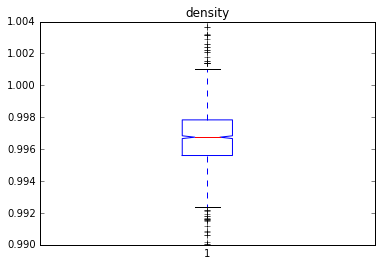

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.boxplot(red_wines['density'].values, notch=True)
plt.title('density');

What can you say about the red wines density using this plot?

You can also personalised the boxplot:

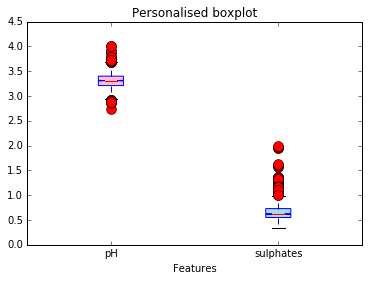

In [26]:
# List of features we want to use
features = ['pH', 'sulphates']

# List of colors for the boxes
colors = ['pink', 'lightblue']

# Outliers properties
flierprops = dict(marker='o', markerfacecolor='red', markersize=10, linestyle='none')

# Figure creation
plt.figure()
axes = plt.subplot(1, 1, 1)   # We get the axes of the figure
boxplot = plt.boxplot(red_wines[features].values, notch=True,
                      patch_artist=True, # Boxplot color
                      flierprops=flierprops)
for patch, color in zip(boxplot.get('boxes'), colors):  # We fill the boxes with the right color
    patch.set_facecolor(color)

# Set the right labels
plt.xlabel('Features')
plt.title('Personalised boxplot');
plt.setp(axes, xticks=[y+1 for y in range(len(features))], xticklabels=features);

Let's know compare the results we obtained from the boxplot against a histogram of the feature: